# Филтрирање на слика во фреквенциски домен

## Теорија

За да филтрираме слика во фреквенциски домен 
потребно е да ја помножиме сликата во фреквенциски 
домен со филтерот (кернел) кој е исто така во фреквенциски домен.

$$I_{f,filt} = HI_f$$

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:


$$H(i,j)=e^{-\dfrac{d(i,j)^2}{f_{h}^{2}}}\left(1-e^{-\dfrac{d(i,j)^2}{f_{l}^{2}}}\right)$$

Каде што $d(i,j)$ е евклидовото растојанието на даден пиксел од центарот на сликата, додека $f_h$ и $f_l$ се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме.
Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

$$F(u,v)=\underset{-\infty}\iint^{\infty}f(x,y)e^{-i2\pi(ux+vy)}dxdy$$

А во дискретниот домен горната равенка може да биде преведена како

$$F(u,v) = \displaystyle\sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f[m,n] \cdot e^ {-i2\pi(umx_0+vny_0)}$$
        
Конверзија на 2D сликата од фреквенциски во просторен домен се прави со
користење на инверзна Фуриева трансформација. Инверзната Фуриева
трансформација е дефинирана како:

$$f(x,y)=\underset{-\infty}\iint^{\infty}F(u,v)e^{i2\pi(ux+vy)}dudv$$

А во дискретниот домен горната равенка може да биде преведена како

$$F(x,y) = \displaystyle\sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f[m,n] \cdot e^ {i2\pi(xmu_0+ynv_0)}$$

## Имплементација и визуелизација

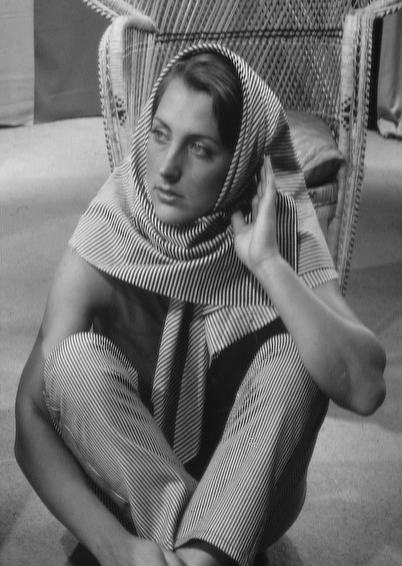

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
pil_im = Image.open('Requirements/Barbara.tif', 'r')
display(pil_im)

Фуриева трансформација на слика се прави на следниот начин:

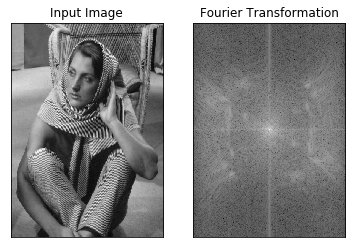

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Requirements/Barbara.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Fourier Transformation'), plt.xticks([]), plt.yticks([])
plt.show()